In [15]:
import pandas as pd
data = pd.read_csv('data2.csv')
hypothesis = data[data["buy"] == "yes"].iloc[0, :-1].to_dict()

for i in range(1, len(data)):
    if data.iloc[i, -1] == "yes":
        for attr in hypothesis.keys():
            if data.iloc[i][attr] != hypothesis[attr]:
                hypothesis[attr] = "?"

print("Final Hypothesis:")
print(hypothesis)


Final Hypothesis:
{'citations': 'many', 'size': '?', 'inlibrary': 'no', 'price': '?', 'editions': '?'}


In [16]:
import pandas as pd
data = pd.read_csv("data2.csv")
specific_hypothesis = data.iloc[0, :-1].to_dict()
general_hypothesis = {key: "?" for key in specific_hypothesis}

for i in range(1, len(data)):
    if data.iloc[i, -1] == "yes":
        for attr in specific_hypothesis.keys():
            if data.iloc[i][attr] != specific_hypothesis[attr]:
                specific_hypothesis[attr] = "?"
                general_hypothesis[attr] = "?"
    else:
        for attr in specific_hypothesis.keys():
            if data.iloc[i][attr] != specific_hypothesis[attr]:
                general_hypothesis[attr] = specific_hypothesis[attr]

print("Specific Hypothesis:")
print(specific_hypothesis)
print("\nGeneral Hypothesis:")
print(general_hypothesis)

Specific Hypothesis:
{'citations': '?', 'size': '?', 'inlibrary': 'no', 'price': '?', 'editions': '?'}

General Hypothesis:
{'citations': '?', 'size': '?', 'inlibrary': 'no', 'price': '?', 'editions': '?'}


Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.82      0.78        34
           1       0.92      0.88      0.90        80

    accuracy                           0.86       114
   macro avg       0.83      0.85      0.84       114
weighted avg       0.87      0.86      0.86       114



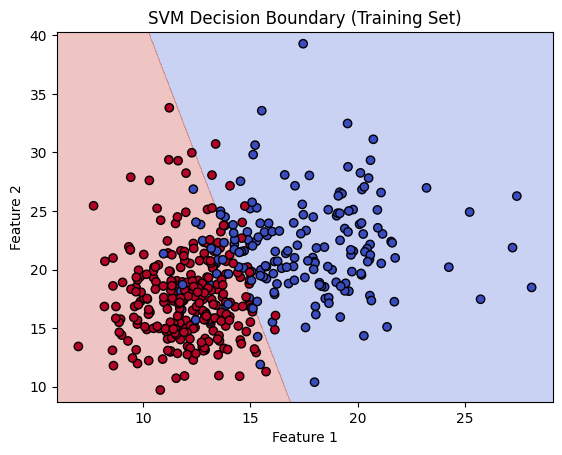

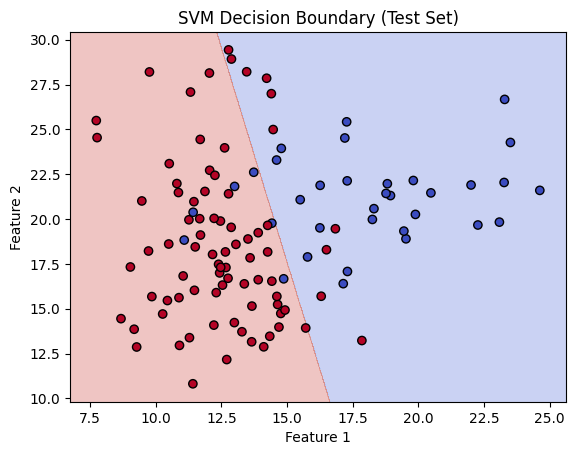

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)
X = X[:, :2]
y = np.where(y == 0, 0, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
svm_model = SVC(kernel="linear").fit(X_train, y_train)

accuracy = accuracy_score(y_test, svm_model.predict(X_test))
report = classification_report(y_test, svm_model.predict(X_test))

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)
def plot_decision_boundary(X, y, model, title):
    h = 0.02
    xx, yy = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, h),np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, h),)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors="k")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(title)
    plt.show()
plot_decision_boundary(X_train, y_train, svm_model, "SVM Decision Boundary (Training Set)")
plot_decision_boundary(X_test, y_test, svm_model, "SVM Decision Boundary (Test Set)")


[1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
0.9666666666666667


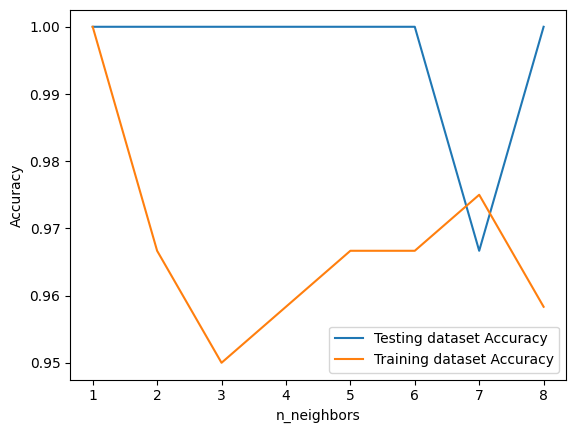

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

irisData = load_iris()

X = irisData.data
y = irisData.target

X_train, X_test, y_train, y_test = train_test_split(
			X, y, test_size = 0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

print(knn.predict(X_test))

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

irisData = load_iris()

X = irisData.data
y = irisData.target
X_train, X_test, y_train, y_test = train_test_split(
			X, y, test_size = 0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

print(knn.score(X_test, y_test))

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

irisData = load_iris()

X = irisData.data
y = irisData.target

X_train, X_test, y_train, y_test = train_test_split(
			X, y, test_size = 0.2, random_state=42)

neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
	knn = KNeighborsClassifier(n_neighbors=k)
	knn.fit(X_train, y_train)

	train_accuracy[i] = knn.score(X_train, y_train)
	test_accuracy[i] = knn.score(X_test, y_test)

plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifier = GaussianNB()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


C:\Users\Hemanth Raghu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


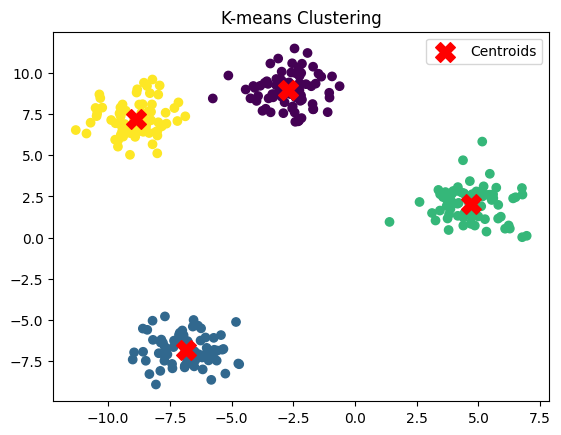

In [3]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title('K-means Clustering')
plt.legend()
plt.show()

In [2]:
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

dataset = [['Milk', 'Bread', 'Butter'],
           ['Bread', 'Eggs'],
           ['Milk', 'Eggs', 'Butter'],
           ['Bread', 'Butter'],
           ['Milk', 'Bread', 'Eggs']]

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)

print("Frequent Itemsets:")
print(frequent_itemsets)

from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

print("\nAssociation Rules:")
print(rules)

Frequent Itemsets:
    support               itemsets
0       0.8                (Bread)
1       0.6               (Butter)
2       0.6                 (Eggs)
3       0.6                 (Milk)
4       0.4        (Butter, Bread)
5       0.4          (Eggs, Bread)
6       0.4          (Bread, Milk)
7       0.2         (Eggs, Butter)
8       0.4         (Butter, Milk)
9       0.4           (Eggs, Milk)
10      0.2  (Butter, Bread, Milk)
11      0.2    (Eggs, Bread, Milk)
12      0.2   (Eggs, Butter, Milk)

Association Rules:
      antecedents consequents  antecedent support  consequent support  \
0  (Eggs, Butter)      (Milk)                 0.2                 0.6   

   support  confidence      lift  leverage  conviction  zhangs_metric  
0      0.2         1.0  1.666667      0.08         inf            0.5  


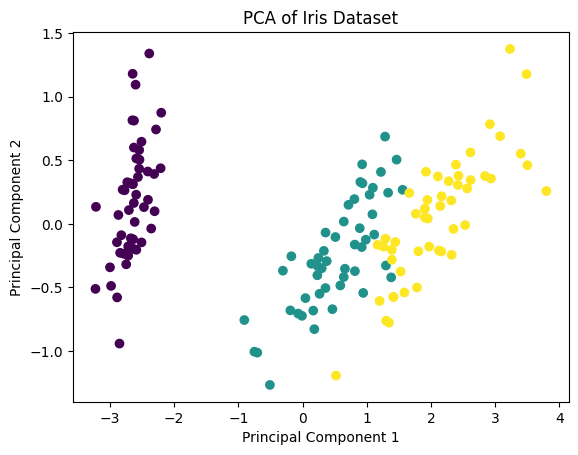

In [3]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()